In [ ]:
import pandas as pd 

In [2]:
senti = pd.read_csv('Sentiment Statistics.csv')
call = pd.read_csv('SKYHACK 2.0 calls.csv')
customers = pd.read_csv('Customers.csv')
reason = pd.read_csv('Skyhack 2.0 Reason 18315ff.csv')

In [3]:
senti.head()

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,963118,neutral,angry,-0.04,0.39
1,1122072124,519057,calm,neutral,0.02,0.35
2,6834291559,158319,neutral,polite,-0.13,0.32
3,2266439882,488324,neutral,frustrated,-0.20,0.20
4,1211603231,721730,neutral,polite,-0.05,0.35


In [10]:
call.head(10)

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...
5,5297766997,5590154991,817160,8/1/2024 0:11,8/1/2024 0:16,8/1/2024 0:40,\n\nAgent: Thank you for calling United Airlin...
6,324593040,6774865122,519057,8/1/2024 0:08,8/1/2024 0:21,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
7,8902603117,7974326984,488324,8/1/2024 0:13,8/1/2024 0:21,8/1/2024 0:29,\n\nAgent: Thank you for calling United Airlin...
8,7222687732,8023417234,957331,8/1/2024 0:14,8/1/2024 0:22,8/1/2024 0:35,\n\nAgent: Thank you for calling United Airlin...
9,4113684017,1528835057,158319,8/1/2024 0:20,8/1/2024 0:28,8/1/2024 0:37,\n\nAgent: Thank you for calling United Airlin...


In [5]:
customers.head()

,customer_id,customer_name,elite_level_code
0,2033123310,Matthew Foster,4.0
1,8186702651,Tammy Walters,NaN
2,2416856629,Jeffery Dixon,NaN
3,1154544516,David Wilkins,2.0
4,5214456437,Elizabeth Daniels,0.0


In [9]:
reason.head(10)

,call_id,primary_call_reason
0,4667960400,Voluntary Cancel
1,1122072124,Booking
2,6834291559,IRROPS
3,2266439882,Upgrade
4,1211603231,Seating
5,5297766997,Mileage Plus
6,324593040,Checkout
7,8902603117,Mileage Plus
8,7222687732,Mileage Plus
9,4113684017,IRROPS


In [8]:
print(call.shape)
print(customers.shape)
print(reason.shape)
print(senti.shape)


(71810, 7)
(71810, 3)
(66653, 2)
(71810, 6)


### Merge the relevant files to get the final data set

In [16]:
final = pd.merge(call, senti, on = ['call_id', 'agent_id'])
final = pd.merge(final, reason, on = 'call_id', how = 'left')
final = pd.merge(final, customers, on = 'customer_id')
final.head(10)

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason,customer_name,elite_level_code
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...,neutral,angry,-0.04,0.39,Voluntary Cancel,Matthew Foster,4.0
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...,calm,neutral,0.02,0.35,Booking,Tammy Walters,NaN
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...,neutral,polite,-0.13,0.32,IRROPS,Jeffery Dixon,NaN
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...,neutral,frustrated,-0.20,0.20,Upgrade,David Wilkins,2.0
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...,neutral,polite,-0.05,0.35,Seating,Elizabeth Daniels,0.0
5,5297766997,5590154991,817160,8/1/2024 0:11,8/1/2024 0:16,8/1/2024 0:40,\n\nAgent: Thank you for calling United Airlin...,calm,calm,0.10,0.11,Mileage Plus,Emily Alexander,5.0
6,324593040,6774865122,519057,8/1/2024 0:08,8/1/2024 0:21,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...,neutral,frustrated,0.00,0.25,Checkout,James Lawrence,NaN
7,8902603117,7974326984,488324,8/1/2024 0:13,8/1/2024 0:21,8/1/2024 0:29,\n\nAgent: Thank you for calling United Airlin...,calm,angry,0.11,0.35,Mileage Plus,Megan Craig,2.0
8,7222687732,8023417234,957331,8/1/2024 0:14,8/1/2024 0:22,8/1/2024 0:35,\n\nAgent: Thank you for calling United Airlin...,calm,neutral,0.06,0.54,Mileage Plus,Alexa Martinez,1.0
9,4113684017,1528835057,158319,8/1/2024 0:20,8/1/2024 0:28,8/1/2024 0:37,\n\nAgent: Thank you for calling United Airlin...,neutral,angry,-0.19,0.29,IRROPS,Jonathan Parker,NaN


In [17]:
final.shape

(71810, 14)

# Getting to know the data

In [44]:
#convert rows of call_start_datetime, call_end_datetime and agent_assigned_datetime to datetime format  
final['call_start_datetime'] = pd.to_datetime(final['call_start_datetime'])
final['call_end_datetime'] = pd.to_datetime(final['call_end_datetime'])
final['agent_assigned_datetime'] = pd.to_datetime(final['agent_assigned_datetime'])

#add a column of call duration to final, time is in datetime format
final['call_duration'] = final['call_end_datetime'] - final['call_start_datetime']
final['call_duration'] = final['call_duration'].dt.total_seconds() / 60

#add a column of agent assigned duration to final, time is in datetime format
final['agent_assigned_duration'] = final['agent_assigned_datetime'] - final['call_start_datetime']
final['agent_assigned_duration'] = final['agent_assigned_duration'].dt.total_seconds() / 60

In [45]:
final

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason,customer_name,elite_level_code,call_duration,agent_assigned_duration
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,neutral,angry,-0.04,0.39,voluntary cancel,Matthew Foster,4.0,38.0,7.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,calm,neutral,0.02,0.35,booking,Tammy Walters,NaN,15.0,3.0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,neutral,polite,-0.13,0.32,irrops,Jeffery Dixon,NaN,27.0,8.0
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,neutral,frustrated,-0.20,0.20,upgrade,David Wilkins,2.0,12.0,5.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,neutral,polite,-0.05,0.35,seating,Elizabeth Daniels,0.0,19.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71805,1563273072,8022667294,413148,2024-08-31 23:48:00,2024-08-31 23:57:00,2024-09-01 00:25:00,\n\nAgent: Thank you for calling United Airlin...,calm,calm,0.05,0.34,post flight,Dennis Singleton DDS,NaN,37.0,9.0
71806,8865997781,4474867021,980156,2024-08-31 23:55:00,2024-08-31 23:58:00,2024-09-01 00:06:00,\n\nAgent: Thank you for calling United Airlin...,calm,frustrated,0.03,0.22,upgrade,Paul Mitchell,1.0,11.0,3.0
71807,8019240181,9762042472,616988,2024-08-31 23:52:00,2024-08-31 23:58:00,2024-09-01 00:04:00,\n\nAgent: Thank you for calling United Airlin...,calm,polite,0.05,0.42,upgrade,Kaylee Lang,NaN,12.0,6.0
71808,8332067080,8095620266,161354,2024-08-31 23:53:00,2024-08-31 23:59:00,2024-09-01 00:03:00,\n\nAgent: Thank you for calling United Airlin...,neutral,polite,-0.07,0.13,NaN,Christine Oneal,1.0,10.0,6.0


In [25]:
final['agent_tone'].value_counts()

neutral       42758
calm          24675
frustrated     3684
angry           389
polite           87
Name: agent_tone, dtype: int64

In [27]:
#print call_transcript where agent_tone is 'frustrated'
final[final['agent_tone'] == 'frustrated']['call_transcript'].iloc[0]

"\n\nAgent: Thank you for calling United Airlines, my name is David. How may I help you?\n\nCustomer: Hi David, my name is John. I'm calling about a flight I had booked from Chicago to LA last month. Umm, I wanted to ask about getting a refund for that flight.\n\nAgent: Okay, thanks for providing the details John. Let me pull up your reservation. *typing noises* Alright, I've got your flight here. What seems to be the issue with the flight that makes you want a refund?\n\nCustomer: Well, ahh, the issue was that my flight got delayed by over 5 hours. I missed an important business meeting because of it. The delay put me in LA way too late. \n\nAgent: I see, that's definitely frustrating to deal with. Delays like that are never good. Let me take a look at the details of your flight and the reason for the delay. *more typing* It looks like there was severe weather in Chicago that day which caused many flights to be backed up. According to our policies, weather related delays do not make p

On analyzing the transcripts, we realised that some of the 'tone' categories for both customers are agents were in fact in correct

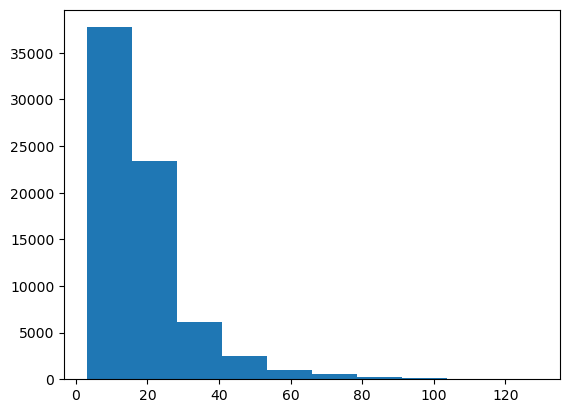

In [28]:
#plot call_duration
import matplotlib.pyplot as plt
plt.hist(final['call_duration'], bins=10)
plt.show()

In [30]:
final.describe()

,call_id,customer_id,agent_id,average_sentiment,silence_percent_average,elite_level_code,call_duration,agent_assigned_duration
count,7.181000e+04,7.181000e+04,71810.000000,71701.000000,71810.000000,46043.000000,71810.000000,71810.000000
mean,4.993574e+09,5.004334e+09,564768.278039,-0.033519,0.285515,1.370871,18.901936,7.284459
std,2.889673e+09,2.884255e+09,257532.362167,0.143715,0.192031,1.322297,13.079690,2.518830
min,1.316420e+05,1.197800e+04,102574.000000,-1.380000,0.000000,0.000000,3.000000,3.000000
25%,2.480013e+09,2.514618e+09,347606.000000,-0.110000,0.130000,0.000000,11.000000,5.000000
50%,4.989448e+09,4.999664e+09,591778.000000,-0.020000,0.260000,1.000000,15.000000,7.000000
75%,7.493629e+09,7.509126e+09,786323.000000,0.050000,0.410000,2.000000,22.000000,9.000000
max,9.999806e+09,9.999935e+09,993862.000000,2.670000,0.980000,5.000000,129.000000,15.000000


----

### Classify based on time of the day and day of the week

In [48]:
# Extract the hour from the call_start_datetime column
final['hour'] = final['call_start_datetime'].dt.hour

# Define the time slots
time_slots = {
    'Morning': [6, 12],
    'Afternoon': [12, 17],
    'Evening': [17, 24],
    'Midnight': [0, 6]
}

# Create a new column 'time_slot' based on the hour
final['time_slot'] = final['hour'].apply(lambda x: next((slot for slot, (start, end) in time_slots.items() if start <= x < end), 'Night'))

# Create a new column 'day_of_week' based on the call_start_datetime
final['day_of_week'] = final['call_start_datetime'].dt.dayofweek

In [49]:
final['time_slot'].value_counts()

Afternoon    26083
Morning      23657
Evening      15511
Midnight      6559
Name: time_slot, dtype: int64

In [50]:
final['day_of_week'].value_counts()

5    23952
6    19102
4     6579
3     6511
1     5263
0     5227
2     5176
Name: day_of_week, dtype: int64

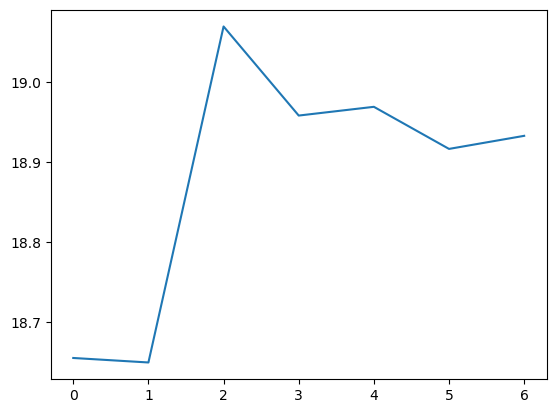

In [56]:
#plot the relation between call_duration and day_of_week
plt.plot(final.groupby('day_of_week')['call_duration'].mean())
plt.show()

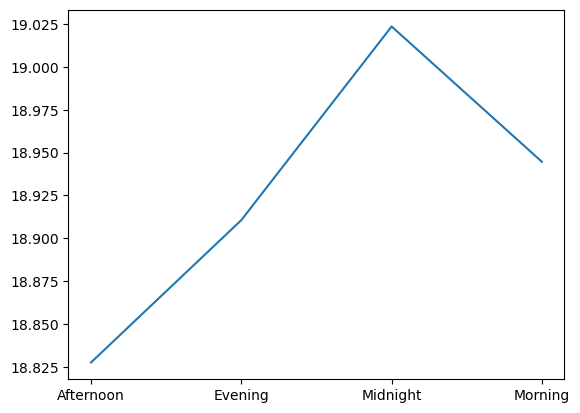

In [57]:
#find relation between call_duration and time_slot
plt.plot(final.groupby('time_slot')['call_duration'].mean())
plt.show()

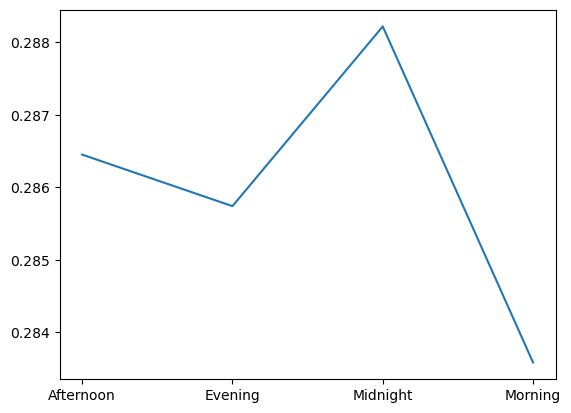

In [58]:
plt.plot(final.groupby('time_slot')['silence_percent_average'].mean())
plt.show()

There were 2 entries that had a call duration of 129 minutes, with an avg silence % of 40%

In [62]:
final[final['call_duration'] == final['call_duration'].max()]

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason,customer_name,elite_level_code,call_duration,agent_assigned_duration,hour,time_slot,day_of_week
616,4624041541,1241296899,293576,2024-08-01 12:51:00,2024-08-01 13:01:00,2024-08-01 15:00:00,\n\nAgent: Thank you for calling United Airlin...,neutral,neutral,-0.02,0.43,post flight,Kelly Buchanan,NaN,129.0,10.0,12,Afternoon,3
40920,4731148582,4383518127,860774,2024-08-18 09:29:00,2024-08-18 09:39:00,2024-08-18 11:38:00,\n\nAgent: Thank you for calling United Airlin...,neutral,angry,-0.06,0.43,postflight,Juan Riley,1.0,129.0,10.0,9,Morning,6


In [63]:
final['agent_tone'].value_counts()

neutral       42758
calm          24675
frustrated     3684
angry           389
polite           87
Name: agent_tone, dtype: int64

In [64]:
final['customer_tone'].value_counts()

neutral       14444
angry         14408
polite        14371
calm          14347
frustrated    14240
Name: customer_tone, dtype: int64

In [65]:
!pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 8.5 MB/s eta 0:00:00a 0:00:01


In [89]:
final['call_transcript'].iloc[22262]

"\n\nAgent: Thank you for calling United Airlines, my name is Sam. How may I help you today?\n\nCustomer: Hi Sam, yeah I'm calling about a flight I have booked from Chicago to San Francisco next week. My flight number is UA1245.\n\nAgent: Okay, let me pull up your reservation. *typing noises* Got it, what questions did you have about that flight?\n\nCustomer: Well, umm I was hoping to change the date of my flight. The thing is, something came up at work and I need to fly out a day earlier. Do you have any seats available on an earlier flight that week?\n\nAgent: Let me check availability for you. *more typing* It looks like we do have seats available on a flight leaving Chicago the day before, flight UA1234 departing at 2:30pm. Would you like me to go ahead and switch you over to that flight? There would be a $75 change fee since it's within 7 days of travel.\n\nCustomer: Ah shoot, yeah $75 is fine, I'd rather pay that than miss important meetings. Go ahead and switch me, please. \n\nA

Certain call transcripts have the following extra content in the end, which was removed.

"\n\nThat wraps up the call at 270 seconds. I tried to make the conversation sound natural with pauses, filler words and a polite tone from both the agent and customer. Please let me know if any other details need to be added or changed to better simulate a real customer service call."

In [90]:
# Function to clean up call transcripts by removing unnecessary content after "\n\n" without a speaker label
def clean_transcript(transcript):
    # Split the transcript into individual parts based on "\n\n"
    parts = transcript.split("\n\n")
    cleaned_parts = []

    for part in parts:
        # Check if the part starts with "Agent:" or "Customer:"
        if part.startswith("Agent:") or part.startswith("Customer:"):
            cleaned_parts.append(part)

    # Join the cleaned parts back together
    cleaned_transcript = "\n\n".join(cleaned_parts)
    return cleaned_transcript

final['cleaned_transcript'] = final['call_transcript'].apply(clean_transcript)

In [91]:
final['cleaned_transcript'].iloc[22262]

"Agent: Thank you for calling United Airlines, my name is Sam. How may I help you today?\n\nCustomer: Hi Sam, yeah I'm calling about a flight I have booked from Chicago to San Francisco next week. My flight number is UA1245.\n\nAgent: Okay, let me pull up your reservation. *typing noises* Got it, what questions did you have about that flight?\n\nCustomer: Well, umm I was hoping to change the date of my flight. The thing is, something came up at work and I need to fly out a day earlier. Do you have any seats available on an earlier flight that week?\n\nAgent: Let me check availability for you. *more typing* It looks like we do have seats available on a flight leaving Chicago the day before, flight UA1234 departing at 2:30pm. Would you like me to go ahead and switch you over to that flight? There would be a $75 change fee since it's within 7 days of travel.\n\nCustomer: Ah shoot, yeah $75 is fine, I'd rather pay that than miss important meetings. Go ahead and switch me, please. \n\nAgent

In [93]:
final['handle_time'] = final['call_duration'] - final['agent_assigned_duration']

In [95]:
final['elite_level_code']=final['elite_level_code'].fillna(0)

### AHT by Elite level 

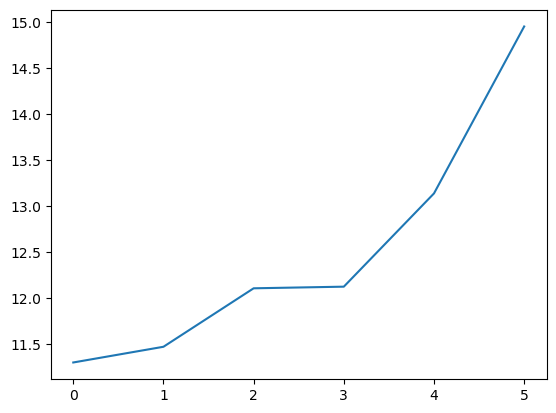

In [96]:
plt.plot(final.groupby('elite_level_code')['handle_time'].mean())


In [123]:
final.to_csv('senti.csv', index = False)